# Loading Data from CSV file

* The Pandas library in Python provides excellent, built-in support for time series data.
* Pandas represents time series datasets as a **Series**. 
* A Series is a one-dimensional array with a time label for each row.
* A Dataframe is a collection of series

In [2]:
import pandas as pd
import numpy as np

temp_df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


## Test-Train Split

In [3]:
temp_df.shape

(3650, 2)

In [4]:
temp_df.shape[0]

3650

In [5]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [6]:
train =  temp_df[0:train_size]

In [7]:
test =  temp_df[train_size:]

In [8]:
train.shape

(2920, 2)

In [9]:
test.shape

(730, 2)

### Walk Forward Validation

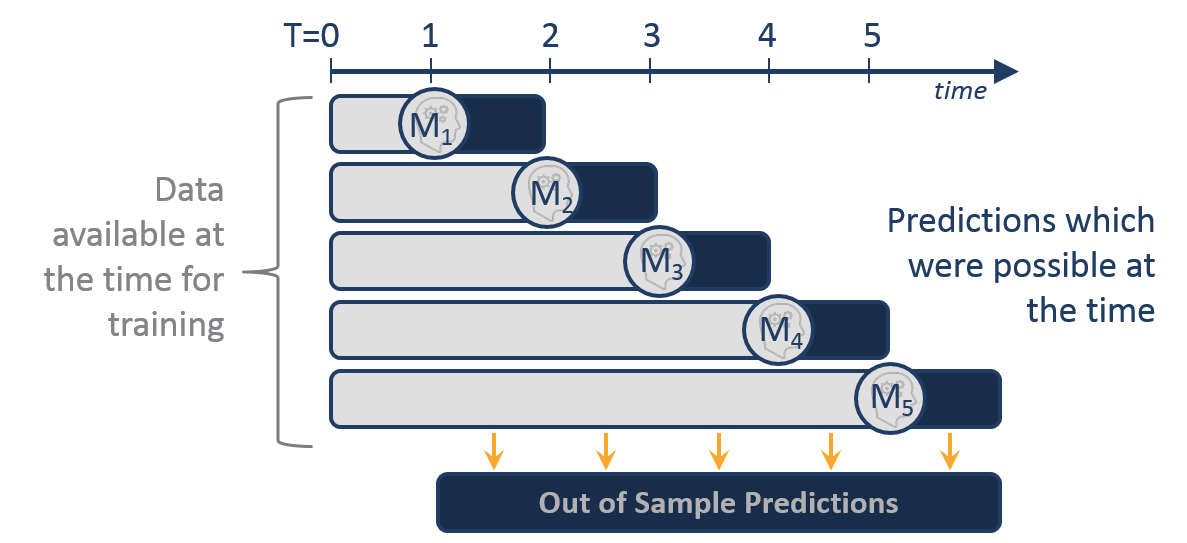

### Persistence Model

In [382]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [383]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [384]:
df['t'] =  df['Temp'].shift(1)

In [385]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [386]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [387]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [388]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

#### # walk-forward validation

In [389]:
predictions = test_X.copy()

In [390]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [391]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [392]:
from matplotlib import pyplot

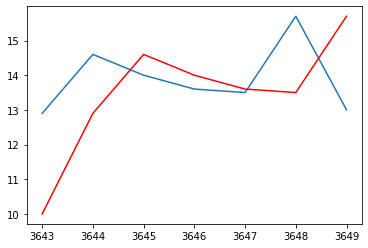

In [393]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Autoregression Model

In [397]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [398]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [399]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [400]:
from statsmodels.tsa.ar_model import AR

In [401]:
model = AR(train)
model_fit = model.fit()

#### No. of lag Variables

In [402]:
model_fit.k_ar

29

#### Coef of lag variables

In [403]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [404]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [405]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [408]:
predictions.iloc[0]

11.871274847727832

In [409]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

1.501525231006988

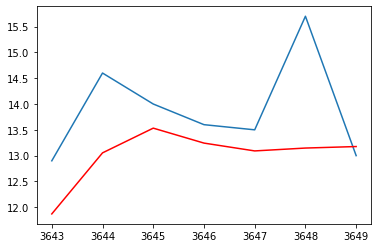

In [410]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Walk Forward

In [411]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [412]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [413]:
data = train
predict =[]
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    

11.871274847727832
13.660699943835198
14.353164144090158
13.43012079162701
13.374756477185123
13.47911129942051
14.767773018439883


In [414]:
predict

[11.871274847727832,
 13.660699943835198,
 14.353164144090158,
 13.43012079162701,
 13.374756477185123,
 13.47911129942051,
 14.767773018439883]

In [415]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.452456842518536

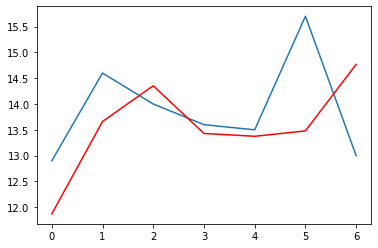

In [416]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

### Moving Average Model

In [417]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [418]:
df['t'] =  df['Temp'].shift(1)

In [419]:
df['Resid'] = df['Temp'] - df['t']

In [420]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [421]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [422]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [423]:
from statsmodels.tsa.ar_model import AR

In [424]:
model = AR(train)
model_fit = model.fit()

In [425]:
model_fit.k_ar

29

In [426]:
model_fit.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [427]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [428]:
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [429]:
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [430]:
predictions = df.t[df.shape[0]-7:] + pred_resid

In [431]:
predictions

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [432]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

2.049398556648206

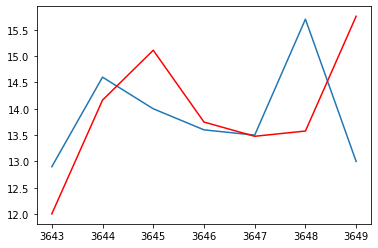

In [433]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')